<a href="https://colab.research.google.com/github/oektomo/KelasRLG2/blob/master/annTutorialnonLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Fs = 201
x1 = np.outer(np.linspace(-10., 10., Fs), np.ones(Fs))
x2 = np.outer(np.linspace(-10., 10., Fs), np.ones(Fs))
x2 = x2.T

In [3]:
fx = 0.005* (x1**2 + 2*x2**2)-0.5
fxflaten = fx.flatten()
fxreshape = np.reshape(fxflaten, (Fs, Fs))

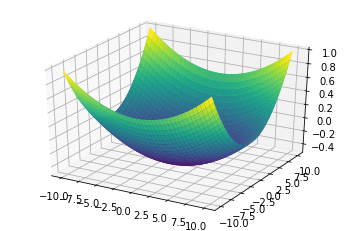

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')
ax.plot_surface(x1, x2, fxreshape,cmap='viridis', edgecolor='none')

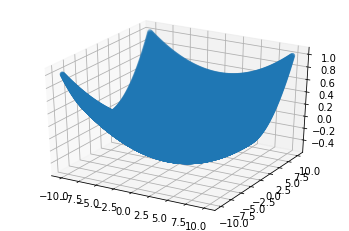

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, fx)

In [6]:
#!pip install tensorflow

In [7]:
import tensorflow.keras as keras
from tensorflow.keras.layers import *

In [8]:
#model = keras.Sequential([keras.layers.Dense(units=2, input_shape=[2])])
model = keras.Sequential()
model.add(Dense(2, input_dim=2, activation='linear'))
# model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
#model.add(Dense(2))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 50)                150       
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 207
Trainable params: 207
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
input1 = np.stack([x1.flatten(), x2.flatten()])

X = input1.T
y = fx.flatten()

In [11]:
model.fit(X, y, epochs=10, batch_size=Fs)

Epoch 1/10
201/201 [==============================] - 2s 5ms/step - loss: 0.1024
Epoch 2/10
201/201 [==============================] - 1s 5ms/step - loss: 0.0600
Epoch 3/10
201/201 [==============================] - 1s 4ms/step - loss: 0.0355
Epoch 4/10
201/201 [==============================] - 1s 5ms/step - loss: 0.0284
Epoch 5/10
201/201 [==============================] - 1s 5ms/step - loss: 0.0237
Epoch 6/10
201/201 [==============================] - 1s 5ms/step - loss: 0.0128
Epoch 7/10
201/201 [==============================] - 1s 7ms/step - loss: 0.0058
Epoch 8/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 9/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/10
201/201 [==============================] - 0s 2ms/step - loss: 0.0026


In [12]:
y_predict = model.predict(X)
y2d_predict = np.reshape(y_predict, (Fs, Fs))
y2d_predict.shape

(201, 201)

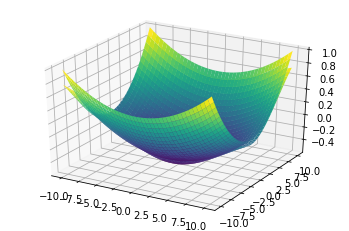

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x1, x2, y2d_predict,cmap='viridis', edgecolor='none')
ax.plot_surface(x1, x2, fx,cmap='viridis', edgecolor='none')